In [1]:
import os
import torch
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10 

2024-10-04 18:46:40.415250: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 18:46:40.449528: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-04 18:46:40.626665: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 18:46:40.626748: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 18:46:40.627627: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

## Exercise 1

In [14]:
np_arr = np.random.randint(3, 10, size=(3, 4))
print(np_arr, type(np_arr))

[[8 5 3 7]
 [4 3 6 3]
 [7 9 8 5]] <class 'numpy.ndarray'>


In [15]:
print(np_arr[0][3])

7


In [23]:
print(np_arr[:, :2])

[[8 5]
 [4 3]
 [7 9]]


In [27]:
np_arr_1 = np.random.randint(3, 10, size=12)
print(np_arr_1)


[4 3 5 6 3 8 4 3 7 9 9 9]


In [28]:
np_arr_1_reshaped = np_arr_1.reshape((3,4))
print(np_arr_1_reshaped)

[[4 3 5 6]
 [3 8 4 3]
 [7 9 9 9]]


In [29]:
arr1 = np.random.randint(1,10, size=(3,3))
arr2 = np.random.randint(1,10, size=(3,3))

print(arr1@arr2)

[[ 74  71  75]
 [ 97 128  90]
 [ 44  55  51]]


In [37]:
print("Mean: ",arr1.mean())
print("Standard deviation: ",arr1.std())
print("Median: ",np.median(arr1))

Mean:  4.0
Standard deviation:  2.3570226039551585
Median:  4.0


In [40]:
print("Before: ", np_arr, "\n")
print("After: ",np_arr.flatten())

Before:  [[8 5 3 7]
 [4 3 6 3]
 [7 9 8 5]] 

After:  [8 5 3 7 4 3 6 3 7 9 8 5]


In [41]:
array1 = np.array([[1, 2], 
                   [3, 4]])

array2 = np.array([[5, 6], 
                   [7, 8]])

vertical_stack = np.vstack((array1, array2))
print("Vertical Stacking:\n", vertical_stack)

horizontal_stack = np.hstack((array1, array2))
print("Horizontal Stacking:\n", horizontal_stack)

Vertical Stacking:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Horizontal Stacking:
 [[1 2 5 6]
 [3 4 7 8]]


In [42]:
n=10
random_array = np.random.normal(loc=0.0, scale=1.0, size=n)
other_array = np.random.normal(loc=1.0, scale=1.0, size=n)
addition = random_array + other_array
subtraction = random_array - other_array
multiplication = random_array * other_array
division = random_array / other_array 

print("Random Array:\n", random_array)
print("Other Array:\n", other_array)
print("Element-wise Addition:\n", addition)
print("Element-wise Subtraction:\n", subtraction)
print("Element-wise Multiplication:\n", multiplication)
print("Element-wise Division:\n", division)


Random Array:
 [-0.06877117  0.01451558 -0.24019468 -0.69013421  0.32595183  0.80754994
 -1.38955979 -0.5016213  -0.68610501 -2.20082033]
Other Array:
 [ 0.37875933  3.18767661  1.53419819 -0.12697382  2.56237615  0.94156057
  1.64885298  1.36727634 -0.51365855  1.25106766]
Element-wise Addition:
 [ 0.30998816  3.2021922   1.29400352 -0.81710803  2.88832798  1.74911051
  0.25929319  0.86565504 -1.19976356 -0.94975267]
Element-wise Subtraction:
 [-0.4475305  -3.17316103 -1.77439287 -0.56316039 -2.23642431 -0.13401064
 -3.03841277 -1.86889764 -0.17244646 -3.45188799]
Element-wise Multiplication:
 [-0.02604772  0.04627099 -0.36850624  0.08762898  0.8352112   0.76035718
 -2.29117979 -0.68585494  0.35242371 -2.75337514]
Element-wise Division:
 [-1.81569570e-01  4.55365621e-03 -1.56560396e-01  5.43524795e+00
  1.27206864e-01  8.57671782e-01 -8.42743293e-01 -3.66876310e-01
  1.33572197e+00 -1.75915372e+00]


## Exercise 2

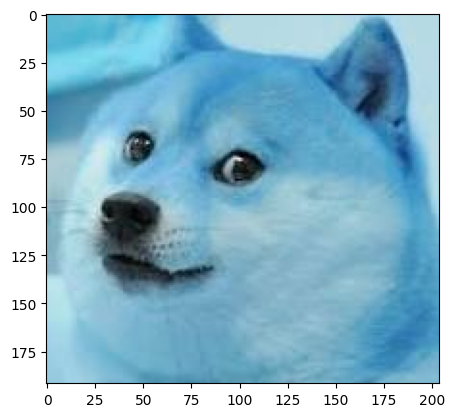

In [3]:
img = cv2.imread("doggo.jpeg")
plt.imshow(img)

In [4]:
image = cv2.imread("doggo.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

resized_image = cv2.resize(image, (width // 2, height // 2))
print(resized_image.shape)

(96, 102, 3)


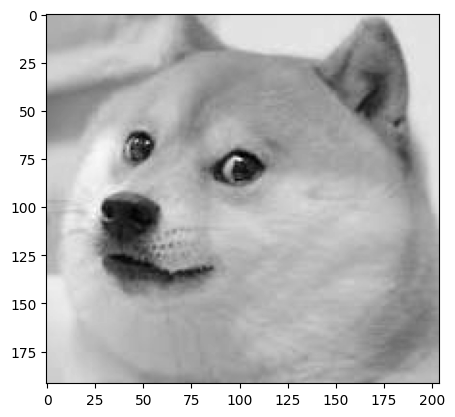

In [5]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image, cmap="gray")

In [6]:
image.shape

(192, 204, 3)

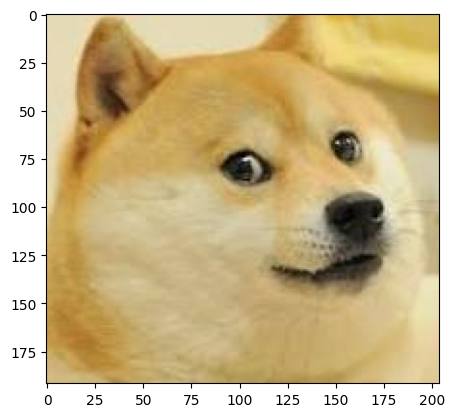

In [8]:
horizontal_flip = cv2.flip(image, 1)
vertical_flip = cv2.flip(image, 0)

plt.imshow(horizontal_flip)

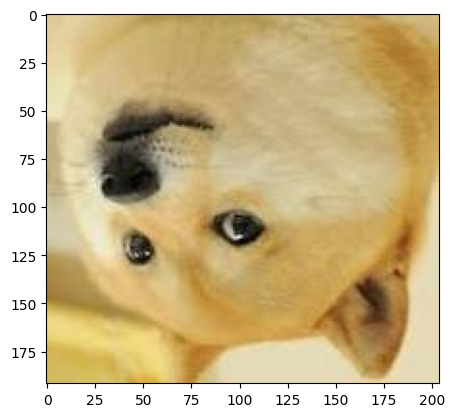

In [9]:
plt.imshow(vertical_flip)

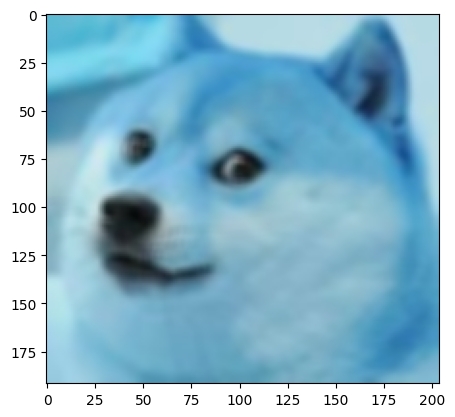

In [16]:
smoothening_kernel = np.ones((5, 5), np.float32) / 25
smoothed_img = cv2.filter2D(image, -1, smoothening_kernel)
smoothed_img_rgb = cv2.cvtColor(smoothed_img, cv2.COLOR_BGR2RGB)
plt.imshow(smoothed_img_rgb)

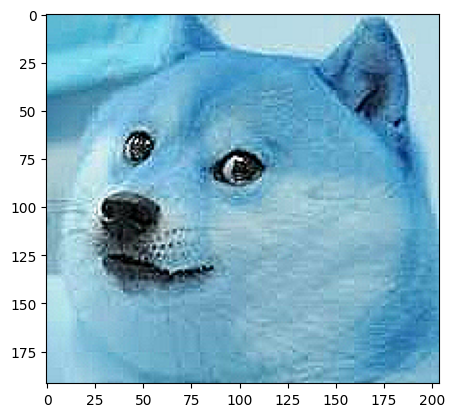

In [18]:
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp_img = cv2.filter2D(image, -1, sharpening_kernel)
sharp_img_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
plt.imshow(sharp_img_rgb)

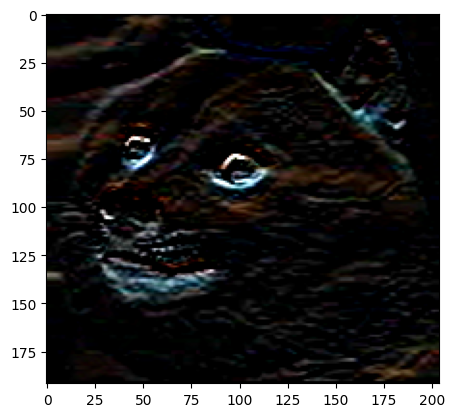

In [19]:
SVkernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
edge_img = cv2.filter2D(image, -1, SVkernel)
edge_img_rgb = cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB)
plt.imshow(edge_img_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


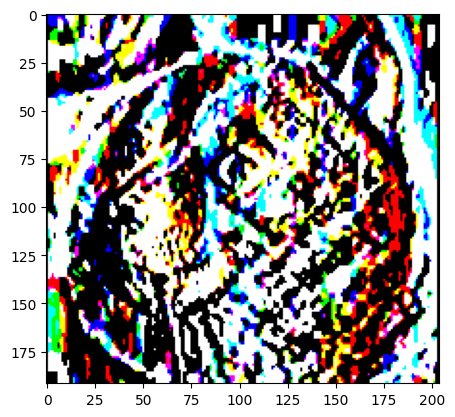

In [20]:
sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
plt.imshow(sobelx)

## Exercise 3

In [6]:
A = torch.rand(3, 3, requires_grad=True)
B = torch.rand(3, 3)

C = torch.matmul(A, B)

C.backward(torch.ones_like(C))

print("Gradient of A:\n", A.grad)

Gradient of A:
 tensor([[0.8512, 0.8763, 1.4656],
        [0.8512, 0.8763, 1.4656],
        [0.8512, 0.8763, 1.4656]])


In [7]:
tensor1 = torch.rand(3, 1)
tensor2 = torch.rand(1, 3)

broadcast_result = tensor1 + tensor2
C = torch.rand(3, 3)
result = broadcast_result * C

print("Result of broadcasting:\n", result)

Result of broadcasting:
 tensor([[1.1773, 0.9084, 0.6238],
        [0.2204, 0.4859, 0.2680],
        [0.6087, 0.2442, 0.9910]])


In [8]:
tensor = torch.rand(6, 4)

reshaped_tensor = tensor.view(3, 8)

sliced_tensor = reshaped_tensor[:, :2]

print("Reshaped Tensor:\n", reshaped_tensor)
print("Sliced Tensor (first two columns):\n", sliced_tensor)

Reshaped Tensor:
 tensor([[0.0644, 0.0934, 0.6452, 0.5972, 0.9199, 0.5601, 0.4757, 0.7783],
        [0.8037, 0.8217, 0.3071, 0.2832, 0.0558, 0.9997, 0.0272, 0.7795],
        [0.4950, 0.2929, 0.9127, 0.0625, 0.4126, 0.2511, 0.0801, 0.7203]])
Sliced Tensor (first two columns):
 tensor([[0.0644, 0.0934],
        [0.8037, 0.8217],
        [0.4950, 0.2929]])


In [9]:
np_array = np.random.rand(3, 3)

torch_tensor = torch.from_numpy(np_array)

modified_tensor = torch_tensor * 3

modified_np_array = modified_tensor.numpy()

print("Original NumPy array:\n", np_array)
print("Modified NumPy array:\n", modified_np_array)

Original NumPy array:
 [[0.32267746 0.71822701 0.21827624]
 [0.45957789 0.24949688 0.52984562]
 [0.43003467 0.68085862 0.7141156 ]]
Modified NumPy array:
 [[0.96803238 2.15468104 0.65482871]
 [1.37873367 0.74849064 1.58953685]
 [1.29010402 2.04257586 2.14234679]]


In [10]:
tensor_uniform = torch.rand(5, 5)

tensor_normal = torch.randn(5, 5)

elementwise_product = tensor_uniform * tensor_normal

mean_val = elementwise_product.mean()
std_val = elementwise_product.std()

reshaped_tensor = elementwise_product.view(25)
sum_val = reshaped_tensor.sum()

print("Mean of result tensor:", mean_val.item())
print("Standard deviation of result tensor:", std_val.item())
print("Sum of all elements:", sum_val.item())

Mean of result tensor: 0.027424873784184456
Standard deviation of result tensor: 0.5586299300193787
Sum of all elements: 0.6856218576431274


## Exercise 4

In [11]:
def sigmoid_math(x):
    return 1 / (1 + math.exp(-x))


def sigmoid_np(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    s = sigmoid_np(x)
    return s * (1 - s)


def image2vector(image):
    return image.reshape(-1, 1)


def normalizeRows(x):
    return x / np.linalg.norm(x, axis=1, keepdims=True)


def L1_loss(y_hat, y):
    return np.sum(np.abs(y_hat - y))


def L2_loss(y_hat, y):
    return np.sum((y_hat - y) ** 2)


x = 1.5
image = np.random.rand(3, 3, 3)
y_hat = np.array([0.9, 0.2, 0.4])
y = np.array([1.0, 0.0, 0.5])
matrix_x = np.array([[4, 3], [1, 2]])

print("Sigmoid using math.exp:", sigmoid_math(x))
print("Sigmoid using np.exp:", sigmoid_np(x))
print("Sigmoid gradient:", sigmoid_grad(x))
print("Image to vector:", image2vector(image))
print("Normalized rows:\n", normalizeRows(matrix_x))
print("L1 Loss:", L1_loss(y_hat, y))
print("L2 Loss:", L2_loss(y_hat, y))

Sigmoid using math.exp: 0.8175744761936437
Sigmoid using np.exp: 0.8175744761936437
Sigmoid gradient: 0.14914645207033286
Image to vector: [[0.86429375]
 [0.56291403]
 [0.57270959]
 [0.04184646]
 [0.06848765]
 [0.11637612]
 [0.69159536]
 [0.82905832]
 [0.51452064]
 [0.20064762]
 [0.13402107]
 [0.57797104]
 [0.67334416]
 [0.19806764]
 [0.0221989 ]
 [0.03247737]
 [0.83618819]
 [0.99573084]
 [0.94705162]
 [0.84372425]
 [0.9256295 ]
 [0.49159989]
 [0.29451266]
 [0.92984915]
 [0.6152323 ]
 [0.92049842]
 [0.58456849]]
Normalized rows:
 [[0.8        0.6       ]
 [0.4472136  0.89442719]]
L1 Loss: 0.39999999999999997
L2 Loss: 0.06


## Exercise 5

To do this locally, I will be using the CIFAR10 datasert from the keras datasets. From the 10 classes, I will be treating the cats class(label: 3) as the positive class, and the other 9 classes as negative classes. 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 199s 1us/step


In [3]:
y_train_binary = np.where(y_train == 3, 1, 0).reshape(-1)
y_test_binary = np.where(y_test == 3, 1, 0).reshape(-1)

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

Shape of the first image (should be 32x32x3 for RGB): (32, 32, 3)


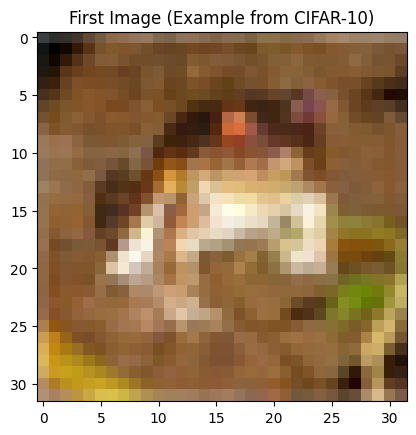

In [11]:
first_image = X_train[0]
print(f"Shape of the first image (should be 32x32x3 for RGB): {first_image.shape}")

plt.imshow(first_image)
plt.title("First Image (Example from CIFAR-10)")
plt.show()

In [5]:
logistic_regression_model = LogisticRegression(max_iter=1000)  
logistic_regression_model.fit(X_train_flatten, y_train_binary)

y_pred = logistic_regression_model.predict(X_test_flatten)

/home/the_architect/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Accuracy of Logistic Regression Classifier: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression Classifier: 89.01%
